# PREDICTING SALE PRICE OF HOUSES (REGRESSION TECHNIQUE)

The dataset was gotten from kaggle, it contains 79 explanatory variables describing (almost) every aspect of residential homes in the U.S. I am provided with a train data and test data which will be imported into this notebook during the course of the project, training data will be used to train the regression model while test data will be used to test how the model will perform on unseen data for real life applications.

The goal of this project is to predict the sales price for houses in the U.S (i.e for each Id in the test set, i am going to use the independent variables to predict the value of the SalePrice variable(dependent variable)) using applied econometrics/statistical methods and python programming language as a tool to apply the econometrics/statistical and mathematical techniques. The stocastic variable i.e the error term (E) is an unknown factor in predicting the dependent variable(SalePrice). Also taking into consideration that the lower the residual(errors) the better the model's performance on predicting the dependent variable(SalePrice).

## How Predicting House Prices Helps an Economy & a Business
Predicting house prices is crucial for economic stability, investment decisions, and business strategies. It helps governments, businesses, and individuals make informed decisions in both macro (economy-wide) and micro (business-level) contexts.

1. Economic Impact (Macroeconomics) 📈
   
✅ Housing as an Economic Indicator
- ✔ House prices can reflect the health of an economy.
- ✔ falling house prices may signal a recession.

Example:
2008 Financial Crisis: A housing market collapse led to a global economic downturn.
Booming Real Estate in China → Shows rapid urbanization and investment growth.

2. Business Impact (Microeconomics) 💰
   
✅ Real Estate & Property Investment
- ✔ Investors use house price predictions to buy low and sell high.
- ✔ Helps in rental pricing strategies.

Example:
If house prices are expected to rise, investors buy properties early.
If a market crash is expected, investors sell assets before losses occur.

## Regression in Econometrics
Econometrics is the application of statistical and mathematical models to economic data for the purpose of testing theories, hypotheses, and future trends. In econometrics, regression analysis is a fundamental statistical tool used to estimate relationships between economic variables. It helps economists quantify causal effects, test hypotheses, and make forecasts.

Goal: To understand how one or more independent variables (X) influence a dependent variable (Y) using real-world data.

### Evaluation Metrics For Regression Models
Evaluation metrics are quantitative measurements that assess how well a model performs. e.g F1-score, Recall, Accuracy, Precision for Classification problem and  MAE, MSE, RMSE, RMSLE... for Regression problem. When building a regression model, you need to measure how well it predicts *continuous* values. 

#### what are continous values?
Continuous values are numbers that can take any value within a range and can have decimal points. They are measured rather than counted, examples are time, temperature, stock prices, weight, speed etc.

Here are the key evaluation metrics used in regression analysis:

#### R-Squared (R²) – Coefficient of Determination 

✅ Explanation:

- Measures how well the model explains the variance in the dependent variable/target variable.
- Ranges from 0 to 1 (or negative if the model is worse than a simple mean prediction).
- R² = 1: Perfect fit.
- R² = 0: Model explains nothing beyond the mean.
- Negative R²: Model is worse.

✅ Use Case:

- Best for assessing the overall model fit.
- Not useful when data has outliers or a nonlinear relationship.


#### Mean Absolute Error (MAE)

✅ Explanation:

- Measures the average absolute difference between actual and predicted values.
- Lower MAE means better predictions.
- Gives equal weight to all errors.

✅ Use Case:

- Useful when you want a simple, interpretable metric that directly shows the average prediction error in real units (e.g., dollars, temperature).


#### Mean Squared Error (MSE)

✅ Explanation:

- Measures the average squared difference between actual and predicted values.
- Squaring penalizes larger errors more, making it sensitive to outliers.

✅ Use Case:

- Good for training machine learning models, since it prioritizes large errors.
- Not directly interpretable, as it’s in squared units.


#### Root Mean Squared Error (RMSE)
 
✅ Explanation:

- Measures the average squared error and takes the square root to bring it back to the same scale as the original data.
- Penalizes large errors more than small ones (due to squaring).
- Errors are measured directly on actual values.

✅ Use Case:

- Used when absolute errors matter (e.g., predicting house prices, sales revenue).
- Good for normally distributed data with no extreme outliers.

#### Root Mean Squared Logarithmic Error (RMSLE)

✅ Explanation:

- Takes the log of actual and predicted values before computing the error.
- Penalizes under-predictions more than over-predictions.
- Handles large ranges and outliers better than RMSE.
  
✅ Use Case:

- Best for cases where relative error matters more than absolute error.
- Good for data that varies exponentially (e.g., population growth, company revenues).
- Ideal when small values should be treated equally important as large values.
- Example: Predicting e-commerce sales (small startups vs. big companies) → A $5 vs. $50 mistake is proportionally the same!

#### Note
- RMSE is better when absolute differences matter
- RMSLE is better when predicting growth-based values or handling small values fairly(e.g., sales, population, startup revenue, number of daily website visitors).

The best evaluation metric for this project might be RMSE OR RMSLE depending on the outlier effect.

Phew!

# Steps taken in the project

1. Exploratory data analysis (EDA): *The process of going through a dataset and discovering more about it.*
   
2. Model training: *Create model(s) to learn to predict a target/dependent variable based on other independent variables.*

3. Model evaluation: *Evaluating a model's predictions using problem-specific evaluation metrics(e.g MAE/MSE/RMSE/RMSLE...)*

4. Model comparison: *Comparing several different models to find the best one.(i will use one model because of computation time).*

5. Model hyperparameter tuning:	*Once we've found a good model, can we tweak its hyperparameters to improve it?*

6. Feature importance: *Since we're predicting housing sale price, are there some features/characteristics that are more important for prediction?*

7. Cross-validation: *If we do build a good model, can we be sure it will work on unseen data?*

8. Reporting what we've found: *If we had to present our work, what would we show someone?*

   ### Proof Of Concept(POC)
A proof of concept (POC) is a small-scale test that shows if a new idea or design is feasible. It's used to demonstrate that a project is viable before committing too many resources.

- Therefore the POC for this project is if we can reach a coeffecient of determination(R squared) at 0.8 and above, we will pursue this project(i will deploy it on streamlit community cloud for public use and notebook will be set to public on my Github repository).

## 1. Exploratory data analysis (EDA)

In [1]:
# import tools for EDA
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Print last updated
import datetime
print(f"This Notebook was last updated: {datetime.datetime.now()}\n")

This Notebook was last updated: 2025-04-02 09:04:27.217978



In [2]:
# display data dictionary to understand each variables of the dataset
from IPython.display import display, Markdown

with open("housing data/data_description.txt", "r") as file:
    content = file.read()

display(Markdown(f"```\n{content}\n```"))


```
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

```

Each features are tagged to floats(decimals), integers(whole numbers), and objects(i.e strings e.g alphabets or symbols). hence the name data dictionary. 

In [3]:
# import training data 
df = pd.read_csv("housing data/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.shape 

(1460, 81)

In [6]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and validation (20%) to avoid data leakage 
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

# Check sizes
print(f"Training set size: {train_df.shape}")
print(f"Validation set size: {val_df.shape}")


Training set size: (1168, 81)
Validation set size: (292, 81)


In [7]:
# export to both training and validation data to csv
train_df.to_csv("housing data/Housing_train_data.csv", index=False)
val_df.to_csv("housing data/Hosuing_validation_data.csv", index=False)

print("Datasets saved successfully!")


Datasets saved successfully!


In [8]:
# import training data 
df_train = pd.read_csv("housing data/Housing_train_data.csv")

In [9]:
# view dataframe
df_train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,145000
1,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000


In [10]:
df_train.shape

(1168, 81)

In [11]:
df_train["YearBuilt"]

0       1957
1       1993
2       1910
3       1937
4       1924
        ... 
1163    2006
1164    1928
1165    1955
1166    1918
1167    2007
Name: YearBuilt, Length: 1168, dtype: int64

In [12]:
df_train["YearRemodAdd"]

0       1957
1       1994
2       1950
3       1950
4       1950
        ... 
1163    2006
1164    1950
1165    1990
1166    1998
1167    2007
Name: YearRemodAdd, Length: 1168, dtype: int64

In [13]:
df_train["MoSold"]

0        6
1        5
2        5
3        6
4        5
        ..
1163     3
1164    12
1165     4
1166     6
1167     6
Name: MoSold, Length: 1168, dtype: int64

In [14]:
df_train["YrSold"]

0       2010
1       2009
2       2008
3       2007
4       2010
        ... 
1163    2007
1164    2009
1165    2006
1166    2007
1167    2009
Name: YrSold, Length: 1168, dtype: int64

From my observation so far, this is a panel data and we will treat it as such because it examines variations across different housing entities and time periods. To do this we will use feature engineering to create features from the "YrSold" and "Mosold" into Quarterly and Time indexing

Feature engneering - Feature engineering is the process of transforming raw data into more informative and relevant features to improve the performance of machine learning models.

steps taken to applying feature engineering

1. Extracting Quarter from Month - The goal is to determine the quarter (Q1, Q2, Q3, Q4) for each row based on the Month.

A year has 12 months, and each quarter consists of 3 months:
- Q1: Jan (1), Feb (2), Mar (3)
- Q2: Apr (4), May (5), Jun (6)
- Q3: Jul (7), Aug (8), Sep (9)
- Q4: Oct (10), Nov (11), Dec (12)

2. Creating a Continuous Time Index - The goal is to create a continuous time index that represents time as a single numeric value instead of separate Year and Month columns. This is useful for tracking trends over time (especially for machine learning models).

In [15]:
def add_time_features(df, year_col="Year", month_col="Month"):
    """
    This function extracts the quarter and creates a continuous time index.
    """
    # Extract Quarter
    df["Quarter"] = df["MoSold"].apply(lambda x: (x - 1) // 3 + 1)

    # Create Continuous Time Index (based on the earliest year in the dataset)
    min_year = df["YrSold"].min()  # Use the minimum year from the dataset
    df["Time_Index"] = (df["YrSold"] - min_year) * 12 + df["MoSold"]
    
    return df


In [16]:
df_copy = df_train.copy() # make a copy of df

In [17]:
df_added_feaures = add_time_features(df=df_copy, year_col=df_copy["YrSold"], month_col=df_copy["MoSold"])

In [18]:
df_added_feaures

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Quarter,Time_Index
0,255,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,6,2010,WD,Normal,145000,2,54
1,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,5,2009,WD,Normal,178000,2,41
2,639,30,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,5,2008,WD,Normal,85000,2,29
3,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,6,2007,WD,Normal,175000,2,18
4,381,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2010,WD,Normal,127000,2,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,3,2007,WD,Normal,176432,1,15
1164,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,MnPrv,NaN,0,12,2009,WD,Normal,135000,4,48
1165,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2006,WD,Normal,115000,2,4
1166,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,GdPrv,NaN,0,6,2007,WD,Normal,189950,2,18


In [19]:
# check for missing value
missing_values = df_added_feaures.isnull().sum()
print(missing_values[missing_values > 0])

LotFrontage      217
Alley           1094
MasVnrType       683
MasVnrArea         6
BsmtQual          28
BsmtCond          28
BsmtExposure      28
BsmtFinType1      28
BsmtFinType2      28
Electrical         1
FireplaceQu      547
GarageType        64
GarageYrBlt       64
GarageFinish      64
GarageQual        64
GarageCond        64
PoolQC          1162
Fence            935
MiscFeature     1122
dtype: int64


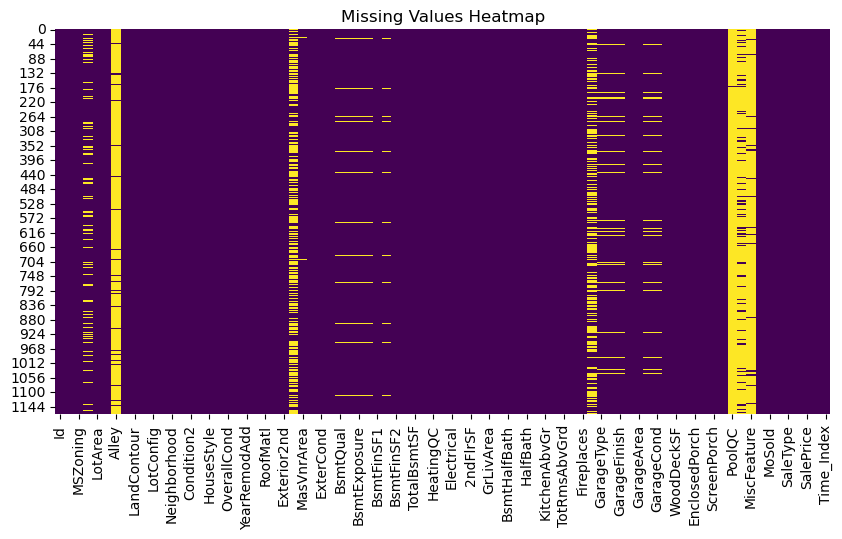

In [20]:
# Visualize missing data
plt.figure(figsize=(10, 5))
sns.heatmap(df_added_feaures.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

The yellow bars represent missing values

In [21]:
# checking for missing values percentage
missing_percent = (missing_values[missing_values > 0] / len(df_added_feaures) * 100)
missing_percent

LotFrontage     18.578767
Alley           93.664384
MasVnrType      58.476027
MasVnrArea       0.513699
BsmtQual         2.397260
BsmtCond         2.397260
BsmtExposure     2.397260
BsmtFinType1     2.397260
BsmtFinType2     2.397260
Electrical       0.085616
FireplaceQu     46.832192
GarageType       5.479452
GarageYrBlt      5.479452
GarageFinish     5.479452
GarageQual       5.479452
GarageCond       5.479452
PoolQC          99.486301
Fence           80.051370
MiscFeature     96.061644
dtype: float64

If a column has more than 30-50% missing values, consider dropping it unless the missing data can be imputed meaningfully but if only a few rows are missing in a column, it may be better to impute(fill missing value) rather than drop the column.

In [22]:
df_copy.shape

(1168, 83)

In [23]:
df_copy.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.185788
LotArea          0.000000
                   ...   
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Quarter          0.000000
Time_Index       0.000000
Length: 83, dtype: float64

In [24]:
# a function for dropping columns with missing values over 40percent
def drop_high_missing_columns(df, threshold=40):
    """
    Drops columns with more than a specified percentage of missing values.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    threshold (float): The percentage threshold (default is 40%).

    Returns:
    pd.DataFrame: A new DataFrame with dropped columns.
    """
    # Convert threshold to a fraction
    missing_fraction = threshold / 100
    
    # Calculate the percentage of missing values per column
    missing_percent = df.isnull().mean()
    
    # Get columns that exceed the threshold
    cols_to_drop = missing_percent[missing_percent > missing_fraction].index
    
    # Drop columns
    df_cleaned = df.drop(columns=cols_to_drop)
    
    print(f"Dropped {len(cols_to_drop)} columns: {list(cols_to_drop)}")
    
    return df_cleaned


In [25]:
df_copy_cleaned = drop_high_missing_columns(df=df_copy, threshold=40)

Dropped 6 columns: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [26]:
df_copy_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Quarter,Time_Index
0,255,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,6,2010,WD,Normal,145000,2,54
1,1067,60,RL,59.0,7837,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,5,2009,WD,Normal,178000,2,41
2,639,30,RL,67.0,8777,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,5,2008,WD,Normal,85000,2,29
3,800,50,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,6,2007,WD,Normal,175000,2,18
4,381,50,RL,50.0,5000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,5,2010,WD,Normal,127000,2,53


In [27]:
df_copy_cleaned.shape, df_copy.shape # compare with previous df

((1168, 77), (1168, 83))

In [28]:
# Summary statistics of numerical features, gives insights into mean, min, max, quartiles, and outliers.
df_copy_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1168.0,730.904966,425.369088,1.0,360.75,732.5,1101.75,1460.0
MSSubClass,1168.0,56.849315,42.531862,20.0,20.00,50.0,70.00,190.0
LotFrontage,951.0,70.343849,24.897021,21.0,59.00,70.0,80.00,313.0
LotArea,1168.0,10689.642123,10759.366198,1300.0,7587.25,9600.0,11700.00,215245.0
OverallQual,1168.0,6.121575,1.367619,1.0,5.00,6.0,7.00,10.0
OverallCond,1168.0,5.584760,1.116062,1.0,5.00,5.0,6.00,9.0
YearBuilt,1168.0,1970.965753,30.675495,1872.0,1953.00,1972.0,2001.00,2010.0
YearRemodAdd,1168.0,1984.897260,20.733955,1950.0,1966.00,1994.0,2004.00,2010.0
MasVnrArea,1162.0,103.771945,173.032238,0.0,0.00,0.0,166.00,1378.0
BsmtFinSF1,1168.0,446.023973,459.070977,0.0,0.00,384.5,721.00,5644.0


In [29]:
# Check unique values in categorical columns
categorical_cols = df_copy_cleaned.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

MSZoning: 5 unique values
Street: 2 unique values
LotShape: 4 unique values
LandContour: 4 unique values
Utilities: 2 unique values
LotConfig: 5 unique values
LandSlope: 3 unique values
Neighborhood: 25 unique values
Condition1: 9 unique values
Condition2: 8 unique values
BldgType: 5 unique values
HouseStyle: 8 unique values
RoofStyle: 6 unique values
RoofMatl: 8 unique values
Exterior1st: 15 unique values
Exterior2nd: 16 unique values
ExterQual: 4 unique values
ExterCond: 5 unique values
Foundation: 6 unique values
BsmtQual: 4 unique values
BsmtCond: 4 unique values
BsmtExposure: 4 unique values
BsmtFinType1: 6 unique values
BsmtFinType2: 6 unique values
Heating: 6 unique values
HeatingQC: 5 unique values
CentralAir: 2 unique values
Electrical: 5 unique values
KitchenQual: 4 unique values
Functional: 7 unique values
GarageType: 6 unique values
GarageFinish: 3 unique values
GarageQual: 5 unique values
GarageCond: 5 unique values
PavedDrive: 3 unique values
SaleType: 9 unique values
Sal

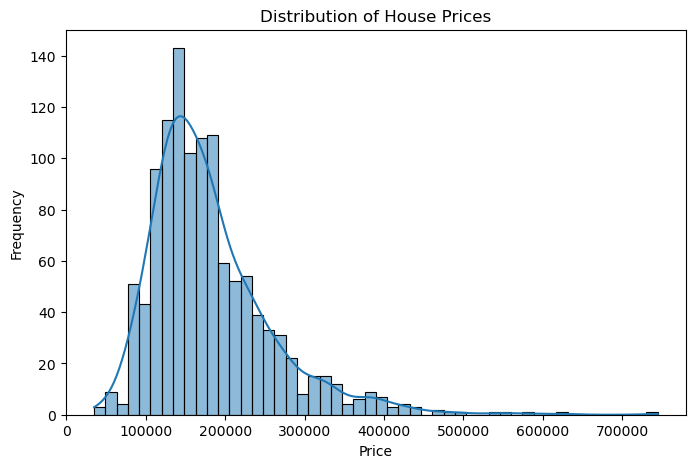

In [30]:
# Identifying skewness or outliers in price distribution.
plt.figure(figsize=(8,5))
sns.histplot(df_copy_cleaned["SalePrice"], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

The histogram is right-skewed (positively skewed). This distribution is common in house prices, where most houses are moderately priced, but a few luxury homes significantly increase the price range

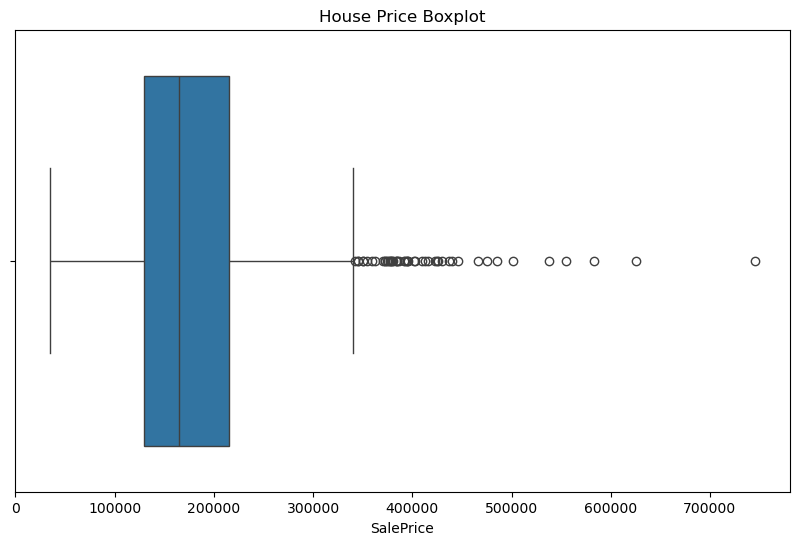

In [31]:
# Detect Outliers Using Boxplots, Helps identify extreme values that may distort the model.
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_copy_cleaned["SalePrice"])
plt.title("House Price Boxplot")
plt.show()

## Impact of Outliers On Linear Regression

Linear Regression is probably the best fit for regression problem but the challenge is that it does not work well with outliers because:

✅ Linear Regression is sensitive to outliers – it minimizes the sum of squared residuals (errors), meaning a single large outlier can have a huge impact on the fitted line.

✅ Outliers pull the regression line, making predictions less reliable.

### Why Are Outliers a Problem for Linear Regression?

- OLS (Ordinary Least Squares) minimizes squared errors → Outliers with large errors get extra weight, distorting the model.
  
- Influence on slope & intercept → A few extreme points can shift the regression line, reducing predictive power.

- Violates assumptions → Linear regression assumes Normally distributed residuals and Homoscedasticity (constant variance).

### Best Approach

- If outliers are due to human errors → Remove them using IQR or Z-score.
- If outliers contain valuable information → Use robust models like Random Forest or XGB.
- If insist on using Linear Regression → Transform the data (e.g., log transformation) to reduce outlier impact.


#### MY Approach
I'm keeping the outliers because they are valid due to luxury houses with extremely high prices in real life scenarous (i want the model to be trained based on this, but for some models like linear regression.. it is advised to remove outliers as it distorts model's performance). i intend to use RandomForestRegressor or XgbRegressor model for training and evaluation.

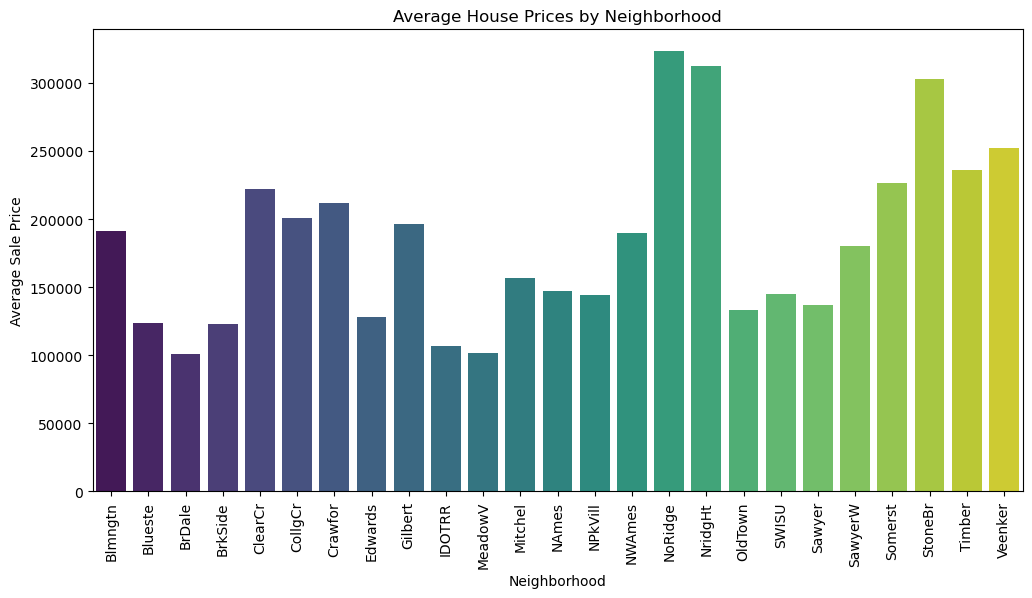

In [32]:
# neighbourhood vs Average SalePrice per neighbourhood using Bar plot for categorical representation
plt.figure(figsize=(12, 6))

# Aggregate: Calculate mean house price per neighborhood
mean_prices = df_copy_cleaned.groupby("Neighborhood")["SalePrice"].mean().reset_index()

# Create Bar Plot (Fix Palette Warning)
sns.barplot(
    data=mean_prices, 
    x="Neighborhood", 
    y="SalePrice", 
    hue="Neighborhood",  # Assign hue to x variable
    dodge=False,  # Prevents separation of bars
    palette="viridis",  
    legend=False  # Hides unnecessary legend
)

plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title("Average House Prices by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Average Sale Price")

plt.show()

## 2. Model Training
### Preparing Data for Machine learning And Correlation Analysis

- This involves Encoding categorical column and filling missing values as machine learning model can best learn to make predictions on future data by getting trained on numbers(e.g floats, integers, ones or zeros) and not Objects like strings or symbols.
  
- correlation Analysis is used for knowing the feature importance of the independent/explanatory varibales in predicting the dependent varibale (SalePrice). These helps to know which of the variables are contributing postively or negatively to the Model's prediction.

In [33]:
df_copy_cleaned.head(2) # training data set

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Quarter,Time_Index
0,255,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,6,2010,WD,Normal,145000,2,54
1,1067,60,RL,59.0,7837,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,5,2009,WD,Normal,178000,2,41


In [34]:
# import validation data set for cleaning
df_val = pd.read_csv("housing data/Hosuing_validation_data.csv")

In [35]:
df_val.head(2) # validation data 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000


In [36]:
# Drop 6 columns: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
df_val_cleaned = drop_high_missing_columns(df_val)

Dropped 6 columns: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [37]:
df_val_cleaned.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,893,20,RL,70.0,8414,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2006,WD,Normal,154500
1,1106,60,RL,98.0,12256,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,325000


In [38]:
# feature engineering on validaton data
df_val_added_features = add_time_features(df=df_val_cleaned, year_col=df_val_cleaned["YrSold"], month_col=df_val_cleaned["MoSold"])

In [39]:
df_val_added_features.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Quarter,Time_Index
0,893,20,RL,70.0,8414,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2006,WD,Normal,154500,1,2
1,1106,60,RL,98.0,12256,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,4,2010,WD,Normal,325000,2,52


In [40]:
df_copy_cleaned.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Quarter,Time_Index
0,255,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,6,2010,WD,Normal,145000,2,54
1,1067,60,RL,59.0,7837,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,5,2009,WD,Normal,178000,2,41


In [41]:
df_copy_cleaned.shape, df_val_added_features.shape

((1168, 77), (292, 77))

In [42]:
# Define numerical and categorical features
numerical_features = [label for label, content in df_copy_cleaned.items() if pd.api.types.is_numeric_dtype(content)]
categorical_features = [label for label, content in df_copy_cleaned.items() if not pd.api.types.is_numeric_dtype(content)]

print(f"[INFO] Numeric features: {numerical_features}")
print(f"[INFO] Categorical features: {categorical_features[:10]}...")

[INFO] Numeric features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Quarter', 'Time_Index']
[INFO] Categorical features: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2']...


In [43]:
# preprocessing train and validation data (OneHotEncoding)
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# fill numerical column with median for skewed data(outlier)
num_imputer = SimpleImputer(strategy="median")  # You can change to "mean" or "most_frequent
df_copy_cleaned[numerical_features] = num_imputer.fit_transform(df_copy_cleaned[numerical_features])
df_val_added_features[numerical_features] = num_imputer.transform(df_val_added_features[numerical_features])

# fill categorical column with missing
df_copy_cleaned[categorical_features] = df_copy_cleaned[categorical_features].fillna("Missing")
df_val_added_features[categorical_features] = df_val_added_features[categorical_features].fillna("Missing")

# Preprocessing train and validation data (OneHotEncoding)
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Prevents unseen category errors

# Fit and transform categorical columns of training data
train_encoded_array = one_hot_encoder.fit_transform(df_copy_cleaned[categorical_features].astype(str))
train_encoded_df = pd.DataFrame(train_encoded_array, 
                                columns=one_hot_encoder.get_feature_names_out(categorical_features),
                                index=df_copy_cleaned.index)

# Transform categorical columns of validation data
valid_encoded_array = one_hot_encoder.transform(df_val_added_features[categorical_features].astype(str))
valid_encoded_df = pd.DataFrame(valid_encoded_array, 
                                columns=one_hot_encoder.get_feature_names_out(categorical_features),
                                index=df_val_added_features.index)

# Drop original categorical columns and concatenate the new encoded columns
x_train_preprocessed = df_copy_cleaned.drop(columns=categorical_features)
x_train_preprocessed = pd.concat([x_train_preprocessed, train_encoded_df], axis=1)

x_valid_preprocessed = df_val_added_features.drop(columns=categorical_features)
x_valid_preprocessed = pd.concat([x_valid_preprocessed, valid_encoded_df], axis=1)

In [44]:
x_train_preprocessed.head(2) 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,255.0,20.0,70.0,8400.0,5.0,6.0,1957.0,1957.0,0.0,922.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1067.0,60.0,59.0,7837.0,6.0,7.0,1993.0,1994.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
x_valid_preprocessed.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,893.0,20.0,70.0,8414.0,6.0,8.0,1963.0,2003.0,0.0,663.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1106.0,60.0,98.0,12256.0,8.0,5.0,1994.0,1995.0,362.0,1032.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
# Check missing values for encoded training data
print(x_train_preprocessed.isnull().sum().sum())  # Counts missing values per column

0


In [47]:
# Check missing values for encoded validation data
print(x_valid_preprocessed.isnull().sum().sum())  # Counts missing values per column

0


## Model training

In [48]:
# train data
x_train = x_train_preprocessed.drop("SalePrice", axis=1)
y_train = x_train_preprocessed["SalePrice"]

# validation data
x_valid = x_valid_preprocessed.drop("SalePrice", axis=1)
y_valid = x_valid_preprocessed["SalePrice"]

In [49]:
#!pip install xgboost

Next is to train two regressor model and make comparison based on model with best r2 score(coefficient of determination) i.e a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

In [50]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor (default runs on CPU)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)  # n_jobs=-1 uses all CPU cores


In [51]:
# fit RF model for training
random_forest_model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [52]:
# score the model on training data
random_forest_model.score(x_train, y_train)

0.9791477775303187

- model's performance on training data is a proportion of 0.9791477775303187 explains the variance of the dependent variable from the independent varibale/explanatory variable. the performance is high because the model was trained on data which it has seen. if the model performs well on training data and poorly on validation data(unseen data), then we can assume gthat the model is overfitting.
  
- A model overfits when it learns the training data too well, including noise and irrelevant details, leading to poor generalization to unseen data. This is often caused by a complex model, insufficient training data, or noisy data. 

## 3. Model evaluation

In [53]:
# score RF model perfromance
random_forest_model.score(x_valid, y_valid)

0.8898070530988551

model's performance on unseen data(validation data) is a proportion of 0.8898070530988551 explains the variance of the dependent variable from the independent varibale/explanatory variable. This means our model is performing quite well on unseen data, we will pursue this process since we exceeded our POC(proof of concept) mark.

In [54]:
# Create evaluation function (Root Mean Square Log Error)
from sklearn.metrics import mean_absolute_error, root_mean_squared_log_error

# Create function to evaluate our model
def show_scores(model, 
                train_features=x_train,
                train_labels=y_train,
                valid_features=x_valid,
                valid_labels=y_valid):
    
    # Make predictions on train and validation features
    train_preds = model.predict(train_features)
    val_preds = model.predict(valid_features)

    # Create a scores dictionary of different evaluation metrics
    scores = {"Training MAE": mean_absolute_error(y_true=train_labels, 
                                                  y_pred=train_preds),
              "Valid MAE": mean_absolute_error(y_true=valid_labels, 
                                               y_pred=val_preds),
              "Training RMSLE": root_mean_squared_log_error(y_true=train_labels, 
                                                            y_pred=train_preds),
              "Valid RMSLE": root_mean_squared_log_error(y_true=valid_labels, 
                                                         y_pred=val_preds),
              "Training R^2": model.score(X=train_features, 
                                          y=train_labels),
              "Valid R^2": model.score(X=valid_features, 
                                       y=valid_labels)}
    return scores

In [55]:
model_score = show_scores(model=random_forest_model)

In [56]:
model_score

{'Training MAE': 6599.467996575343,
 'Valid MAE': 17727.699280821915,
 'Training RMSLE': 0.05986417788370363,
 'Valid RMSLE': 0.15412837423235173,
 'Training R^2': 0.9791477775303187,
 'Valid R^2': 0.8898070530988551}

## 4. Model comparison: *Comparing several different models to find the best one
i intend to use one model because of comuptationa time and time is of the essesnce when working on projects as real life scenarios requires you to meet a project deadline. We would have tried a different model if our model was performing poorly.

Next is correlation analysis to check the features contributing to the models predictions and hyperparameter tuning would tune the model to perform even better to unseen data.

#### Correlation analysis

In [57]:
# Find the correlation between our independent variables
corr_matrix = x_train.corr()
corr_matrix.T

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,1.000000,0.002216,-0.003836,-0.033411,-0.017880,0.029571,-0.022142,-0.032560,-0.024427,-0.011790,...,-0.022529,-0.033550,0.033225,0.050581,-0.009329,-0.038694,-0.019132,0.001140,0.037685,-0.030284
MSSubClass,0.002216,1.000000,-0.342930,-0.116501,0.029719,-0.052768,-0.001928,0.036081,-0.013443,-0.080944,...,0.026751,-0.049945,-0.001802,0.030103,0.009138,0.018133,0.052720,0.006819,0.016563,-0.052389
LotFrontage,-0.003836,-0.342930,1.000000,0.299038,0.230396,-0.046081,0.117647,0.084741,0.202219,0.218538,...,-0.051640,0.134145,-0.025417,-0.087464,-0.010073,-0.041197,-0.006896,0.017013,-0.090875,0.136508
LotArea,-0.033411,-0.116501,0.299038,1.000000,0.102088,0.001625,0.013541,0.017216,0.126098,0.224270,...,-0.012393,0.021065,-0.008309,0.002092,-0.020970,-0.014647,-0.004183,-0.012239,0.005210,0.021324
OverallQual,-0.017880,0.029719,0.230396,0.102088,1.000000,-0.087599,0.558124,0.538251,0.413083,0.204864,...,0.016228,0.309129,-0.064275,-0.208103,-0.101866,-0.048095,-0.015020,-0.021295,-0.143839,0.311935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,-0.038694,0.018133,-0.041197,-0.014647,-0.048095,-0.043864,-0.049642,-0.044966,-0.013831,-0.016834,...,-0.003436,-0.017642,-0.002428,0.023016,-0.015574,1.000000,-0.004552,-0.007334,-0.127432,-0.017741
SaleCondition_Alloca,-0.019132,0.052720,-0.006896,-0.004183,-0.015020,-0.010871,0.008769,-0.003897,-0.015911,0.021776,...,-0.004552,-0.023368,-0.003216,0.030486,-0.020628,-0.004552,1.000000,-0.009714,-0.168794,-0.023499
SaleCondition_Family,0.001140,0.006819,0.017013,-0.012239,-0.021295,-0.034427,-0.037262,-0.057063,-0.013094,-0.005066,...,-0.007334,-0.037651,-0.005181,0.028688,-0.033237,-0.007334,-0.009714,1.000000,-0.271964,-0.037862
SaleCondition_Normal,0.037685,0.016563,-0.090875,0.005210,-0.143839,0.168361,-0.170471,-0.133935,-0.090479,-0.024532,...,0.026967,-0.654206,-0.090030,0.654619,-0.577506,-0.127432,-0.168794,-0.271964,1.000000,-0.657877


In [58]:
x_train.shape

(1168, 277)

#### Values range from -1 to 1:
- 1.0 → Perfect positive correlation
- -1.0 → Perfect negative correlation
- 0.0 → No correlation

## 5 and 7. Model Hyperparameter Tuning, Cross Validation And Pipeline Integration
Hyperparameter tuning is the process of finding the best set of hyperparameters that optimize a machine learning model’s performance

A Pipeline in machine learning is a way to automate the data preprocessing, feature transformation, and model training steps in a structured workflow. Instead of manually applying each step separately, a pipeline ensures smooth execution while preventing data leakage and improving code reusability.



In [59]:
# Import and prepare data
train_df = pd.read_csv("housing data/Housing_train_data.csv")
valid_df = pd.read_csv("housing data/Hosuing_validation_data.csv")

In [60]:
# drop Columns with 40% nan values
train_df = drop_high_missing_columns(df=train_df)
valid_df = drop_high_missing_columns(df=valid_df)

Dropped 6 columns: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
Dropped 6 columns: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [61]:
# Add date time feature
train_df = add_time_features(df=train_df)
valid_df = add_time_features(df=valid_df)

In [62]:
train_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Quarter,Time_Index
0,255,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,6,2010,WD,Normal,145000,2,54
1,1067,60,RL,59.0,7837,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,5,2009,WD,Normal,178000,2,41


In [63]:
valid_df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Quarter,Time_Index
0,893,20,RL,70.0,8414,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,2,2006,WD,Normal,154500,1,2
1,1106,60,RL,98.0,12256,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,4,2010,WD,Normal,325000,2,52


In [64]:
train_df.shape, valid_df.shape

((1168, 77), (292, 77))

In [65]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_log_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

np.random.seed(42)

# Split data
x_train = train_df.drop("SalePrice", axis=1)
y_train = train_df["SalePrice"]
x_valid = valid_df.drop("SalePrice", axis=1)
y_valid = valid_df["SalePrice"]

# Define feature types
numeric_features = [label for label, content in x_train.items() 
                   if pd.api.types.is_numeric_dtype(content)]
categorical_features = [label for label, content in x_train.items() 
                       if not pd.api.types.is_numeric_dtype(content)]

# Create preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('string_converter', FunctionTransformer(lambda x: x.astype(str))),
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # fill missing values with the term "missing"
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) 
])

# Create preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    verbose_feature_names_out=False  # Simplify feature names
)

# Create full pipeline
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_jobs=-1, random_state=42))  # Set random_state for reproducibility
])

# Function to evaluate the pipeline
def evaluate_pipeline(pipeline, x_train, y_train, x_valid, y_valid):
    # Make predictions
    train_preds = pipeline.predict(x_train)
    valid_preds = pipeline.predict(x_valid)
    
    # Calculate scores
    scores = {
        "Training MAE": mean_absolute_error(y_train, train_preds),
        "Valid MAE": mean_absolute_error(y_valid, valid_preds),
        "Training RMSLE": root_mean_squared_log_error(y_train, train_preds),
        "Valid RMSLE": root_mean_squared_log_error(y_valid, valid_preds),
        "Training R^2": pipeline.score(x_train, y_train),
        "Valid R^2": pipeline.score(x_valid, y_valid)
    }
    return scores

# Fit and evaluate pipeline
print(f"[INFO] Fitting model with one hot encoded values...")
model_pipeline.fit(x_train, y_train)

print(f"[INFO] Evaluating model with one hot encoded values...")
pipeline_scores = evaluate_pipeline(model_pipeline, x_train, y_train, x_valid, y_valid)

print("[INFO] Pipeline with one hot encoding scores:")
pipeline_scores

[INFO] Fitting model with one hot encoded values...
[INFO] Evaluating model with one hot encoded values...
[INFO] Pipeline with one hot encoding scores:


{'Training MAE': 6569.614392123288,
 'Valid MAE': 17719.004589041095,
 'Training RMSLE': 0.05981770007561426,
 'Valid RMSLE': 0.15344690175528572,
 'Training R^2': 0.9797993398326914,
 'Valid R^2': 0.892426755578876}

In [66]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {
    'regressor__n_estimators': [10, 50, 100, 200, 300],  # Prefix with 'regressor__'
    'regressor__max_depth': [None, 10, 20, 30, 50],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2', 0.5],
    'regressor__max_samples': [None, 0.5, 0.75, 1.0]
}

# 2. Setup instance of RandomizedSearchCV to explore different parameters 
rs_model = RandomizedSearchCV(estimator=model_pipeline, # can pass new model instance directly, all settings will be taken from the rf_grid
                              param_distributions=rf_grid,
                              n_iter=20,
                            scoring="neg_root_mean_squared_log_error", # want to optimize for RMSLE, though sometimes optimizing for the default metric (R^2) can lead to just as good results all round
                              cv=3,
                              verbose=3) # control how much output gets produced, higher number = more output

# 3. Fit the model using a series of different hyperparameter values
rs_model.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END regressor__max_depth=10, regressor__max_features=log2, regressor__max_samples=1.0, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=10;, score=-0.176 total time=   0.0s
[CV 2/3] END regressor__max_depth=10, regressor__max_features=log2, regressor__max_samples=1.0, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=10;, score=-0.211 total time=   0.1s
[CV 3/3] END regressor__max_depth=10, regressor__max_features=log2, regressor__max_samples=1.0, regressor__min_samples_leaf=1, regressor__min_samples_split=5, regressor__n_estimators=10;, score=-0.177 total time=   0.1s
[CV 1/3] END regressor__max_depth=20, regressor__max_features=log2, regressor__max_samples=None, regressor__min_samples_leaf=4, regressor__min_samples_split=2, regressor__n_estimators=300;, score=-0.174 total time=   0.9s
[CV 2/3] END regressor__max_depth=20, regressor__max_feat

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['Id',
                                                                                'MSSubClass',
                                                                                'LotFrontage',
                                                                                'LotArea',
                                                                                'OverallQual',
                                                                                'OverallCond',
                                                                                'YearBuilt',
                                                                                'YearRemodAdd',
                                                                                'MasVnrArea',
                                                                                'BsmtFinSF1',
                                                                                'BsmtFinSF2',
                                                                                'BsmtUnfSF',
                                                                                'TotalBsmtSF',
                                                                                '1stFlrSF',
                                                                                '2ndFlrS...
                                                                    random_state=42))]),
                   n_iter=20,
                   param_distributions={'regressor__max_depth': [None, 10, 20,
                                                                 30, 50],
                                        'regressor__max_features': ['sqrt',
                                                                    'log2',
                                                                    0.5],
                                        'regressor__max_samples': [None, 0.5,
                                                                   0.75, 1.0],
                                        'regressor__min_samples_leaf': [1, 2,
                                                                        4],
                                        'regressor__min_samples_split': [2, 5,
                                                                         10],
                                        'regressor__n_estimators': [10, 50, 100,
                                                                    200, 300]},
                   scoring='neg_root_mean_squared_log_error', verbose=3)

In [67]:
rs_model.best_params_

{'regressor__n_estimators': 50,
 'regressor__min_samples_split': 2,
 'regressor__min_samples_leaf': 2,
 'regressor__max_samples': 0.75,
 'regressor__max_features': 0.5,
 'regressor__max_depth': None}

In [68]:
from sklearn.model_selection import GridSearchCV

# Define a refined parameter grid based on the best parameters from RandomizedSearchCV
param_grid = {
    'regressor__n_estimators': [40, 50, 60],  # Tune around 50
    'regressor__min_samples_split': [2, 5],  # Tune around 2
    'regressor__min_samples_leaf': [1, 2, 3],  # Tune around 2
    'regressor__max_samples': [0.75],  # Keep it fixed
    'regressor__max_features': [0.4, 0.5, 0.6],  # Tune around 0.5
    'regressor__max_depth': [None]  
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model_pipeline,  
    param_grid=param_grid,
    scoring='neg_root_mean_squared_log_error',  # Optimize for RMSLE
    n_jobs=-1,  # Use all CPU cores
    cv=3,  # 3 fold cross-validation for lower computaion time but still efficient when balancing accuracy with time
    verbose=2
)

# Fit GridSearchCV
print("[INFO] Running Grid Search...")
grid_search.fit(x_train, y_train)

[INFO] Running Grid Search...
Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['Id',
                                                                          'MSSubClass',
                                                                          'LotFrontage',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'YearBuilt',
                                                                          'YearRemodAdd',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                                          'TotalBsmtSF',
                                                                          '1stFlrSF',
                                                                          '2ndFlrSF',
                                                                          'Lo...
                                       ('regressor',
                                        RandomForestRegressor(n_jobs=-1,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None],
                         'regressor__max_features': [0.4, 0.5, 0.6],
                         'regressor__max_samples': [0.75],
                         'regressor__min_samples_leaf': [1, 2, 3],
                         'regressor__min_samples_split': [2, 5],
                         'regressor__n_estimators': [40, 50, 60]},
             scoring='neg_root_mean_squared_log_error', verbose=2)

In [69]:
grid_search.score(x_valid, y_valid)

-0.1528667658431051

## What Does -0.1528667... Mean?
Since i used GridSearchCV, the scoring function was neg_root_mean_squared_log_error (neg_rmsle).

The actual Root Mean Squared Log Error (RMSLE) is just the absolute value of this:

- RMSLE = 0.1528667...
- A lower RMSLE means better model performance.
- If you want the real RMSLE instead of the negated score, take the absolute value.

In [70]:
abs(grid_search.score(x_valid, y_valid)) # Absolute value


0.15286676584310513

In [71]:
pipeline_scores = evaluate_pipeline(grid_search, x_train, y_train, x_valid, y_valid)

In [72]:
pipeline_scores

{'Training MAE': 9222.208137725615,
 'Valid MAE': 17374.85245154785,
 'Training RMSLE': 0.0844903725188391,
 'Valid RMSLE': 0.15286676584310513,
 'Training R^2': -0.0844903725188391,
 'Valid R^2': -0.15286676584310513}

### Comparing models prediction Vs true values

- Lower is better (close to 0 means near-perfect predictions).
- A good RMSLE for housing data is usually below 0.2, depending on the dataset.

In [73]:
# lets compare model prediction vs true values in a dF
model_prediction = grid_search.predict(x_valid)

In [74]:
# model prediction vs true value dict
compare_with_true_value = {
    "Model prediction": model_prediction,
    "True values": y_valid
} 

In [75]:
# Enveloped in a DataFrame
compare_with_true_value_df = pd.DataFrame(compare_with_true_value)

In [76]:
compare_with_true_value_df

,Model prediction,True values
0,140286.935185,154500
1,316724.289881,325000
2,112966.638889,115000
3,152225.944444,159000
4,308034.106250,315500
...,...,...
287,121784.269974,89471
288,238176.968056,260000
289,174808.181429,189000
290,134961.366429,108000


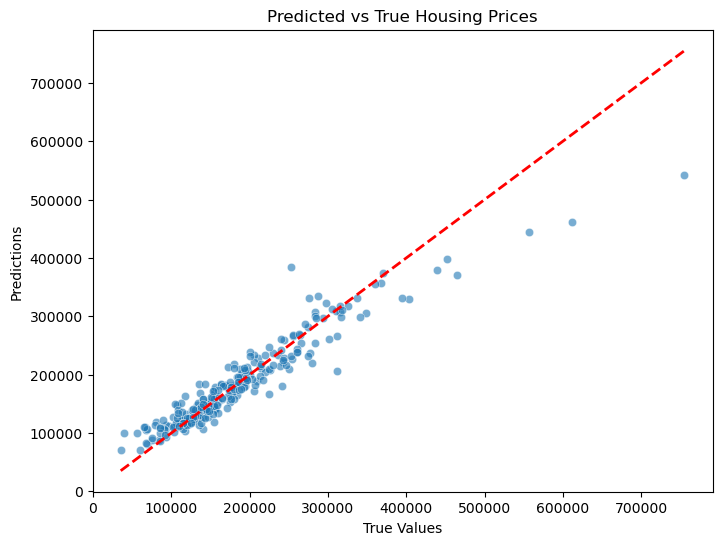

In [77]:
# Visualize predicted vs True housing price with on a scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_valid, y=model_prediction, alpha=0.6)  
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], 'r--', linewidth=2)  # Perfect line
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Predicted vs True Housing Prices")
plt.show()

- If points are close to the red dashed line, the model is performing well.
- If points are consistently above or below the red dashed line, the model is biased (over/underestimates).

Our model seems to be performing reasonably well based on the model's predictions vs true values.

# Feature importance: 
*Since we're predicting housing sale price, are there some features/characteristics that are more important for prediction?

Since we've built a model which is able to make predictions, the people you share these predictions with might be curious of what parts of the data led to these predictions.
Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the dependent/explanatory variable.

In [78]:
# Find feature importance of our best model
best_model = grid_search.best_estimator_  # Get the best model from GridSearchCV
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivArea', 'Bsm...
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', ...])],
                                   verbose_feature_names_out=False)),
                ('regressor',
                 RandomForestRegressor(max_features=0.6, max_samples=0.75,
                                       min_samples_leaf=2, n_estimators=60,
                                       n_jobs=-1, random_state=42))])

In [79]:
#  Find the Correct Name of the Model in the Pipeline
print(best_model.named_steps.keys())

dict_keys(['preprocessor', 'regressor'])


In [80]:
model = best_model.named_steps["regressor"]  # Replace with the actual step name
importances = model.feature_importances_
importances

array([3.30915567e-03, 3.29098377e-03, 7.26721464e-03, 1.81891900e-02,
       4.02360228e-01, 3.56341318e-03, 2.96828188e-02, 7.09379360e-03,
       4.49191517e-03, 2.27250321e-02, 2.42897080e-04, 4.57729065e-03,
       4.27331697e-02, 2.98962391e-02, 2.54323661e-02, 2.30011464e-05,
       1.42185276e-01, 7.93851508e-04, 9.41179213e-05, 1.02533432e-02,
       6.54547200e-04, 1.83732927e-03, 5.86902949e-04, 9.51033234e-03,
       7.18236143e-03, 5.96097548e-03, 6.34752674e-02, 2.83248570e-02,
       4.07511822e-03, 4.99799029e-03, 7.68236167e-04, 4.25329131e-05,
       1.27537605e-03, 0.00000000e+00, 1.80567861e-05, 2.65655868e-03,
       7.68302976e-04, 5.94686535e-04, 2.99499534e-03, 0.00000000e+00,
       1.15276667e-05, 1.72503435e-05, 3.45246424e-04, 1.30787381e-03,
       0.00000000e+00, 0.00000000e+00, 4.25401012e-04, 1.18510074e-04,
       0.00000000e+00, 8.37014832e-04, 8.16897353e-04, 4.54259438e-04,
       1.45019440e-04, 9.90373581e-04, 0.00000000e+00, 0.00000000e+00,
      

In [81]:
for name, transformer, columns in preprocessor.transformers_:
    print(f"Step: {name}, Transformer: {type(transformer)}, Columns: {columns}")


Step: num, Transformer: <class 'sklearn.pipeline.Pipeline'>, Columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'Quarter', 'Time_Index']
Step: cat, Transformer: <class 'sklearn.pipeline.Pipeline'>, Columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'H

In [82]:
feature_names = []

# Extract feature names for numerical columns
num_transformer = preprocessor.named_transformers_["num"]
if hasattr(num_transformer, "get_feature_names_out"):
    feature_names.extend(num_transformer.get_feature_names_out())  # Get processed names
else:
    feature_names.extend(preprocessor.transformers_[0][2])  # Use original column names

# Extract feature names for categorical columns (OneHotEncoded)
cat_transformer = preprocessor.named_transformers_["cat"]
if hasattr(cat_transformer.named_steps["onehot"], "get_feature_names_out"):
    cat_feature_names = cat_transformer.named_steps["onehot"].get_feature_names_out(preprocessor.transformers_[1][2])
    feature_names.extend(cat_feature_names)
else:
    feature_names.extend(preprocessor.transformers_[1][2])  # Use original if get_feature_names_out fails

print(f"Final feature count: {len(feature_names)}")


Final feature count: 277


In [83]:
print(f"Feature names: {len(feature_names)}, Importances: {len(importances)}")

Feature names: 277, Importances: 277


In [84]:
x_valid_preprocessed_feature = x_valid_preprocessed.drop("SalePrice", axis=1)

In [85]:
# Create feature importance DataFrame
column_names = x_valid_preprocessed_feature.columns
feature_importance_df = pd.DataFrame({"feature_names": column_names,
                                      "feature_importance": importances}).sort_values(by="feature_importance",
                                                                                                         ascending=False)
feature_importance_df.head()

,feature_names,feature_importance
4,OverallQual,0.402360
16,GrLivArea,0.142185
26,GarageCars,0.063475
12,TotalBsmtSF,0.042733
166,ExterQual_TA,0.031090


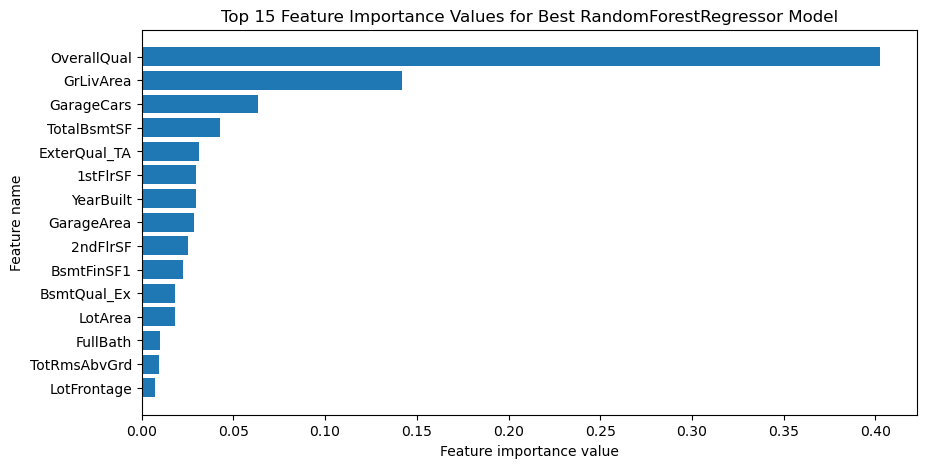

In [86]:
if feature_importance_df is not None:
    top_n = 15
    plt.figure(figsize=(10, 5))
    plt.barh(y=feature_importance_df["feature_names"][:top_n], 
             width=feature_importance_df["feature_importance"][:top_n])
    plt.title(f"Top {top_n} Feature Importance Values for Best RandomForestRegressor Model")
    plt.xlabel("Feature importance value")
    plt.ylabel("Feature name")
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.show()
else:
    print("Feature importance plot skipped due to mismatch.")


Okay, its seem like the top 6 features contributing to our model's predictions are OverallQual, GrLivArea, 2ndFlrSF, TotalBsmtSF, BsmtFinSF1 and 1stFlrSF.
Lets refer to the Original data dictionary from the top of the notebook to know if these values makes sense to be contributing the most to our model's prediction.

1. OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor


2. GrLivArea: Above grade (ground) living area square feet
What It Means:
- It excludes basements, attics, and garages.
- It includes all finished living space above ground (first floor, second floor, etc.).
- It is a key feature in housing price predictions since larger above-ground living areas usually increase home value.
- Homes with higher GrLivArea tend to have higher prices.


3. 2ndFlrSF: Second floor square feet
2ndFlrSF is a part of GrLivArea, but it only includes the second floor.

4. TotalBsmtSF: Total square feet of basement area

5.  BsmtFinSF2: Type 2 finished square feet

6.   1stFlrSF: First Floor square feet

Reading about each of these values seems to make sense that they would contribute significantly to the SalePrice(dependent variable).
it also makes sense that (OverallQual: Rates the overall material and finish of the house) is the most important feature wehn prediction Saleprice, my guess is that a house price of Very excellent will be sold at a higher price than Below verage House quality.

## Testing Model predictions on unseen data(Test data i.e data outside jupyter notebook)

In [87]:
# test on unseen data
test_data = pd.read_csv("housing data/test.csv")

In [88]:
test_data.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [89]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [90]:
# first drop 6 columns which the model wasn't trained on: ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] 
test_data = test_data.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [91]:
# add date time feature which the model was trained on
test_data = add_time_features(df=test_data)

In [92]:
# predict data with trained model
Model_predictions = grid_search.predict(test_data)

In [93]:
test_data["Model Predictions"] = Model_predictions 

In [94]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Quarter,Time_Index,Model Predictions
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,120,0,0,6,2010,WD,Normal,2,54,128201.759722
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,12500,6,2010,WD,Normal,2,54,157293.430556
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,3,2010,WD,Normal,1,51,180315.437302
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,6,2010,WD,Normal,2,54,189462.196032
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,144,0,0,1,2010,WD,Normal,1,49,210938.234683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,6,2006,WD,Normal,2,6,91928.801720
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,4,2006,WD,Abnorml,2,4,95706.660714
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,9,2006,WD,Abnorml,3,9,157968.442460
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,700,7,2006,WD,Normal,3,7,115515.304365


In [97]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1459 non-null   int64  
 1   MSSubClass         1459 non-null   int64  
 2   MSZoning           1455 non-null   object 
 3   LotFrontage        1232 non-null   float64
 4   LotArea            1459 non-null   int64  
 5   Street             1459 non-null   object 
 6   LotShape           1459 non-null   object 
 7   LandContour        1459 non-null   object 
 8   Utilities          1457 non-null   object 
 9   LotConfig          1459 non-null   object 
 10  LandSlope          1459 non-null   object 
 11  Neighborhood       1459 non-null   object 
 12  Condition1         1459 non-null   object 
 13  Condition2         1459 non-null   object 
 14  BldgType           1459 non-null   object 
 15  HouseStyle         1459 non-null   object 
 16  OverallQual        1459 

## 8. Reporting what we've found: 
*If we had to present our work, what would we show someone?* 
This notebook might seem a bit too much or complicated but showing your work through a nice user friendly interface like streamlit or integrating the model into a software using the model's API(application programming interface) will make people interact easily with your work easily.

### steps
- save model
- create a streamlit app
- save stremlit app as app.py in project directory
- export project and its requirements.txt to github repository and set to public
- make app available on streamlit cloud
- you can also make it available for software developer to interact with your model by creating the model's API so that it can be integrated into their software.

In [103]:
!pip install dill

In [106]:
# save model
import dill
with open("grid_search.pk1", "wb") as f:
    dill.dump(grid_search, f) # save model

In [107]:
%%writefile app.py
from fastapi import FastAPI
from pydantic import BaseModel
import numpy as np
import pandas as pd
import dill
from typing import List

# Initialize FastAPI app
app = FastAPI()

# Load trained model (replace with actual model path)
with open("grid_search.pkl", "rb") as f:
    model = dill.load(f)  # model contains a pipeline

# Define input schema
class ModelInput(BaseModel):
    float_features: List[float]  # 11 float features
    int_features: List[int]  # 28 integer features
    cat_features: List[str]  # 37 categorical features

# Preprocessing function
def preprocess_input(input_data: ModelInput):
    # Combine all features into a single list
    features = input_data.float_features + input_data.int_features + input_data.cat_features

    # Ensure the column names match the trained model's feature names
    feature_names = model.feature_names_in_  # This retrieves feature names from sklearn pipeline

    # Convert to DataFrame
    df = pd.DataFrame([features], columns=feature_names)
    
    return df

# Prediction endpoint
@app.post("/predict")
async def predict(input_data: ModelInput):
    # Preprocess input
    data = preprocess_input(input_data)

    # Make prediction
    prediction = model.predict(data)
    
    return {"prediction": prediction.tolist()}

# Root endpoint
@app.get("/")
async def root():
    return {"message": "ML Model API is running!"}

Writing app.py
